In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [125]:
df= pd.read_csv('EPL_20_21.csv')

In [73]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
#checking data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [7]:
#checking null values
df.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [12]:
#Club Names
df['Club'].unique()

array(['Chelsea', 'Manchester City', 'Manchester United', 'Liverpool FC',
       'Leicester City', 'West Ham United', 'Tottenham Hotspur',
       'Arsenal', 'Leeds United', 'Everton', 'Aston Villa',
       'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Southampton', 'Brighton', 'Burnley', 'Fulham',
       'West Bromwich Albion', 'Sheffield United'], dtype=object)

In [17]:
#total number of clubs
df['Club'].nunique()

20

In [18]:
# total number of natonalities from which players played EPL
df['Nationality'].nunique()

59

In [74]:
#clubs with number of players and their nationality
df.groupby('Club')['Nationality'].value_counts().sort_values().head(30)

Club               Nationality
Leicester City     NIR            1
Liverpool FC       SEN            1
                   SUI            1
                   TUR            1
                   WAL            1
Manchester City    ALG            1
                   ARG            1
                   BEL            1
                   GER            1
                   NED            1
                   UKR            1
                   USA            1
Manchester United  NGA            1
                   POR            1
                   SCO            1
                   SRB            1
                   URU            1
                   WAL            1
Newcastle United   ARG            1
                   BRA            1
                   ESP            1
                   FRA            1
                   NIR            1
                   PAR            1
Liverpool FC       SCO            1
Newcastle United   SUI            1
Liverpool FC       POR           

In [211]:
#which nationality has the most players
na_payers=df.groupby('Nationality').size().sort_values(ascending= False).head(5)
na_payers

Nationality
ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
dtype: int64

<Axes: title={'center': 'Nationality Which Represents Most Players'}, xlabel='Nationality', ylabel='Number of Players'>

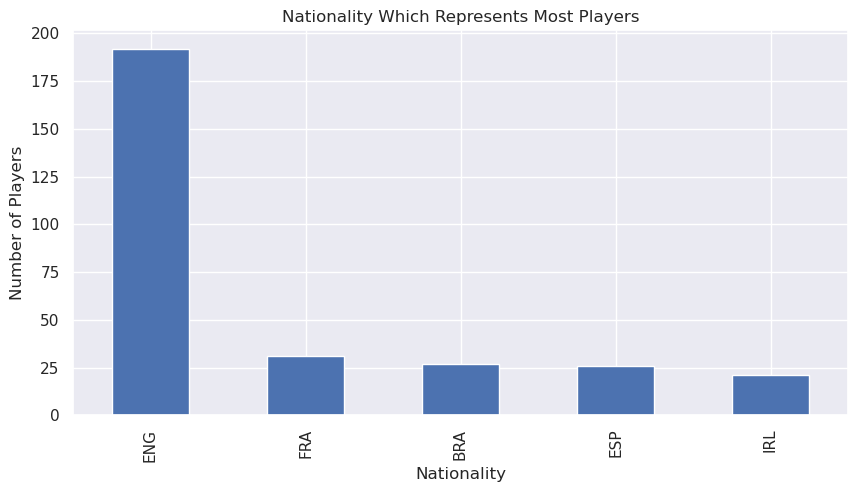

In [180]:
na_payers.plot(kind='bar',xlabel= 'Nationality',ylabel='Number of Players',figsize=(10,5),title='Nationality Which Represents Most Players')

In [78]:
#which club has the most players
club_player= df.groupby('Club').size().sort_values(ascending= False).head()


<Axes: title={'center': 'Clubs With Most Players'}, xlabel='Number of Players', ylabel='Club Names'>

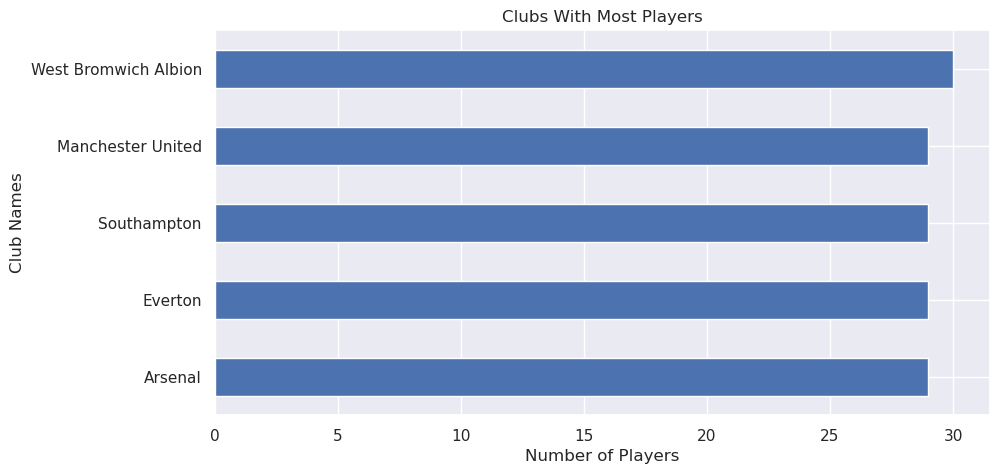

In [188]:
club_player.sort_values().plot.barh(xlabel= 'Number of Players',ylabel='Club Names',figsize=(10,5), title='Clubs With Most Players')

In [84]:
#which club has the most goals

most_goals=df.groupby('Club')['Goals'].sum().sort_values(ascending= False)

<Axes: title={'center': 'Clubs With Most Goals'}, xlabel='Number of Goals', ylabel='Club Names'>

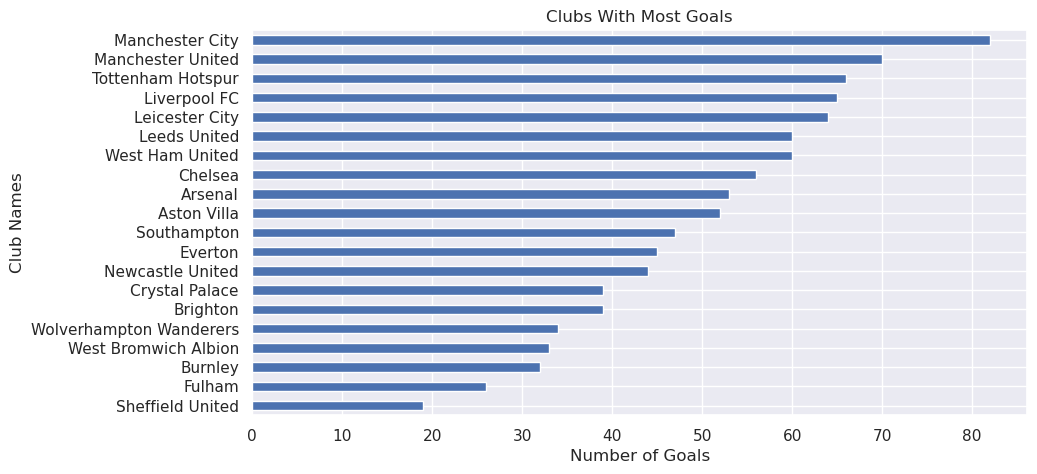

In [190]:
most_goals.sort_values().plot.barh(xlabel= 'Number of Goals',ylabel='Club Names',figsize=(10,5), title='Clubs With Most Goals')

In [204]:
most_=df.groupby('Club')['Goals','Assists'].sum().sort_values(by= 'Goals',ascending= False)
most_

/tmp/ipykernel_804/294214021.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_=df.groupby('Club')['Goals','Assists'].sum().sort_values(by= 'Goals',ascending= False)


,Goals,Assists
Club,,
Manchester City,82,55
Manchester United,70,51
Tottenham Hotspur,66,50
Liverpool FC,65,43
Leicester City,64,45
Leeds United,60,45
West Ham United,60,46
Chelsea,56,38
Arsenal,53,38


<Axes: xlabel='Goals', ylabel='Assists'>

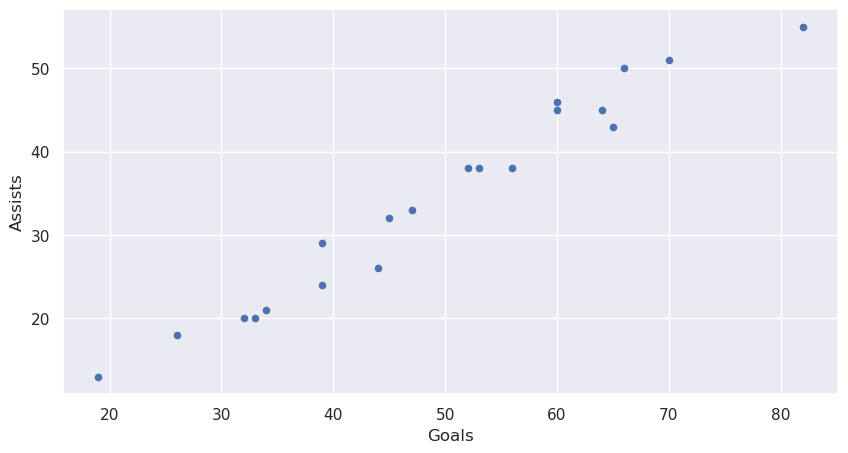

In [210]:
most_.plot.scatter(x='Goals',y='Assists', figsize=(10,5))

In [86]:
#most goal scored by a player
df[['Name','Club','Goals']].sort_values('Goals',ascending= False ).head(10)

,Name,Club,Goals
162,Harry Kane,Tottenham Hotspur,23
81,Mohamed Salah,Liverpool FC,22
51,Bruno Fernandes,Manchester United,18
214,Patrick Bamford,Leeds United,17
161,Son Heung-min,Tottenham Hotspur,17
237,Dominic Calvert-Lewin,Everton,16
110,Jamie Vardy,Leicester City,15
267,Ollie Watkins,Aston Villa,14
33,İlkay Gündoğan,Manchester City,13
191,Alexandre Lacazette,Arsenal,13


In [82]:
df['Name'].nunique()

524

In [93]:
#whih player played the most matches
df[['Name','Matches','Goals']].sort_values('Matches',ascending= False ).head(10)

,Name,Matches,Goals
141,Jarrod Bowen,38,8
213,Luke Ayling,38,0
505,Aaron Ramsdale,38,0
80,Andrew Robertson,38,1
265,Matt Targett,38,0
83,Georginio Wijnaldum,38,2
108,Kasper Schmeichel,38,0
109,Youri Tielemans,38,6
135,Tomáš Souček,38,10
422,Ashley Westwood,38,3


In [201]:
#most yello card by club
df.groupby('Club')['Yellow_Cards'].sum().sort_values(ascending= False).head(10)


Club
Sheffield United     73
Aston Villa          71
Fulham               67
Newcastle United     65
Manchester United    64
Leeds United         61
Leicester City       61
Everton              59
Tottenham Hotspur    57
Crystal Palace       56
Name: Yellow_Cards, dtype: int64

In [97]:
#most red card by club
df.groupby('Club')['Red_Cards'].sum().sort_values(ascending= False).head(10)

Club
Brighton                6
Arsenal                 5
West Bromwich Albion    4
Aston Villa             4
Sheffield United        3
West Ham United         3
Chelsea                 3
Fulham                  3
Southampton             3
Newcastle United        3
Name: Red_Cards, dtype: int64

In [98]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [100]:
#avg age of the players of the club
df.groupby('Club')['Age'].mean().sort_values(ascending= False).head(10)

Club
Crystal Palace          28.333333
West Ham United         27.500000
Burnley                 27.040000
West Bromwich Albion    26.766667
Newcastle United        26.074074
Manchester City         25.708333
Tottenham Hotspur       25.625000
Chelsea                 25.592593
Leicester City          25.592593
Liverpool FC            25.571429
Name: Age, dtype: float64

In [122]:
#how many players in a club whos age is below 25
age_below25= df[df['Age']<25 ]
age_below25['Club'].value_counts()

Manchester United          16
Southampton                16
Leicester City             15
Wolverhampton Wanderers    15
Sheffield United           14
Everton                    13
Fulham                     13
Brighton                   12
Chelsea                    12
Arsenal                    12
Aston Villa                12
Leeds United               11
Tottenham Hotspur          11
West Bromwich Albion       11
Liverpool FC               10
Manchester City             8
Newcastle United            7
Burnley                     7
West Ham United             6
Crystal Palace              4
Name: Club, dtype: int64

In [123]:
#how many players in a club whos age is avobe 25
age_avobe25= df[df['Age']>25 ]
age_avobe25['Club'].value_counts()

Crystal Palace             20
West Bromwich Albion       18
Burnley                    18
Newcastle United           17
West Ham United            17
Liverpool FC               15
Everton                    15
Arsenal                    13
Chelsea                    12
Fulham                     12
Brighton                   12
Sheffield United           12
Manchester City            12
Leeds United               12
Tottenham Hotspur          12
Wolverhampton Wanderers    11
Southampton                11
Leicester City             11
Manchester United          11
Aston Villa                 7
Name: Club, dtype: int64

In [134]:
#avg player age of each club
df.groupby('Club')['Age'].mean().sort_values(ascending= False).head(10)

Club
Crystal Palace          28.333333
West Ham United         27.500000
Burnley                 27.040000
West Bromwich Albion    26.766667
Newcastle United        26.074074
Manchester City         25.708333
Tottenham Hotspur       25.625000
Chelsea                 25.592593
Leicester City          25.592593
Liverpool FC            25.571429
Name: Age, dtype: float64

<Axes: xlabel='Club', ylabel='Age'>

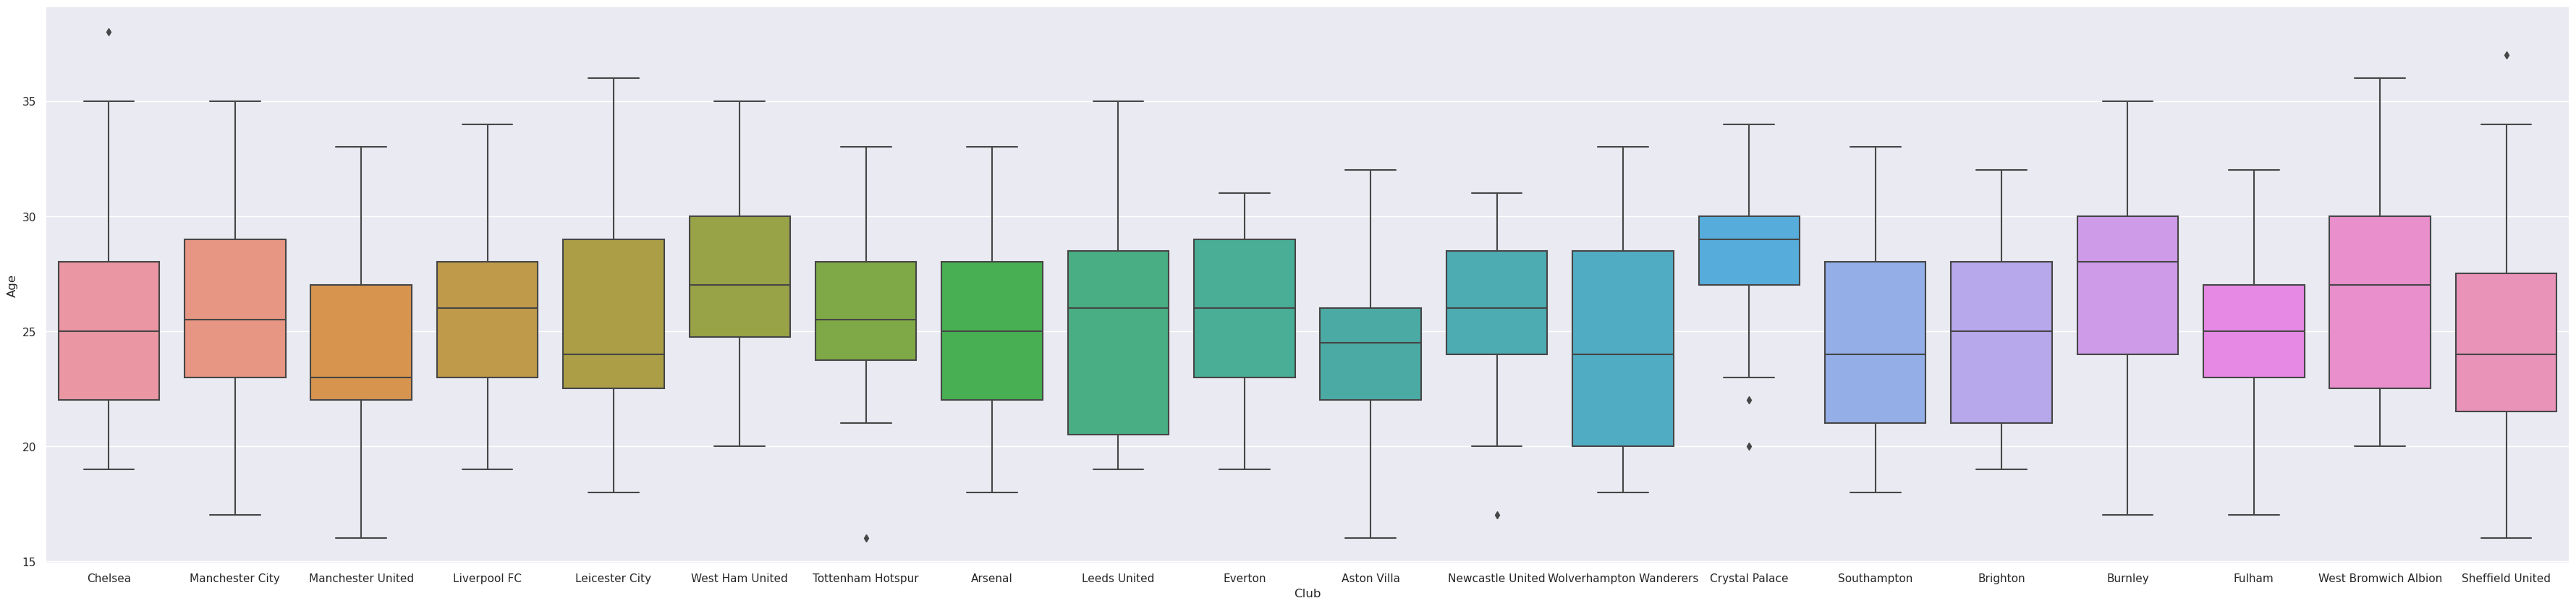

In [146]:
#avg player age of each club as boxplot
sns.set(rc={'figure.figsize':(45,10)})
sns.boxplot(x='Club',y='Age', data=df)

In [149]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [160]:
c= df['Matches'].sum()

In [161]:
b= df['Goals'].sum()
dat=[c,b]
labes= ['match','goal']

([<matplotlib.patches.Wedge at 0x7fdb8558c7d0>,
 [Text(-1.0594935224142497, 0.2957591519501068, 'match'),
  Text(1.0594935224142492, -0.2957591519501074, 'goal')],
 [Text(-0.5779055576804997, 0.16132317379096736, '91%'),
  Text(0.5779055576804996, -0.16132317379096764, '9%')])

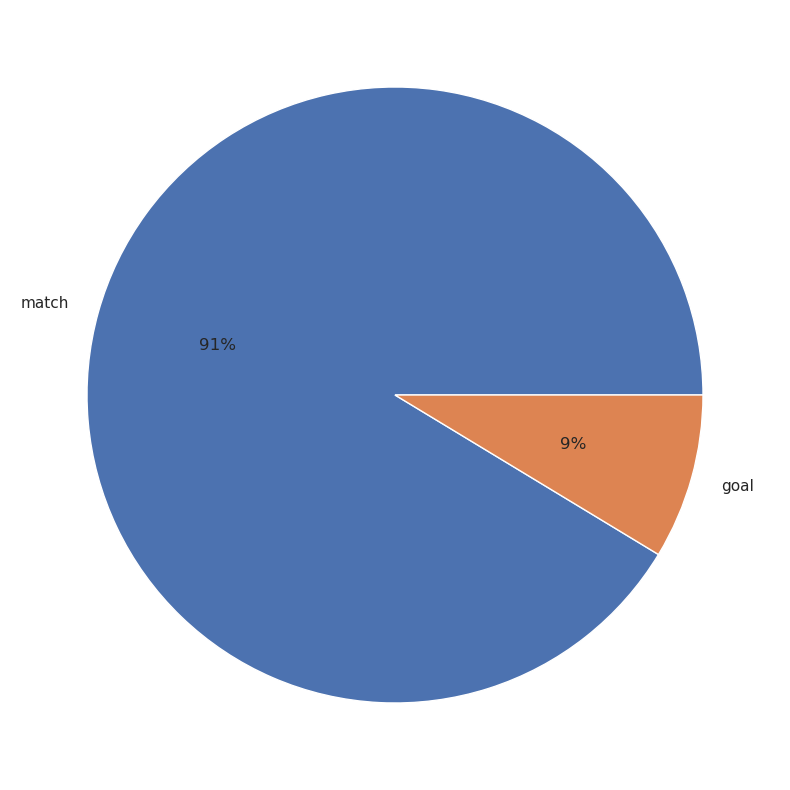

In [163]:
plt.pie(dat,labels=labes,autopct='%.0f%%')

In [168]:

cc= df['Penalty_Attempted'].sum()
bd= df['Penalty_Goals'].sum()
dat=[cc,bd]
labes= ['Penalty Attempted','Goal From Penalty']

([<matplotlib.patches.Wedge at 0x7fdb854261d0>,
 [Text(-0.1743329480840575, 1.0860976121934536, 'Penalty Attempted'),
  Text(0.17433294808405733, -1.0860976121934536, 'Goal From Penalty')],
 [Text(-0.09509069895494045, 0.5924168793782474, '55%'),
  Text(0.09509069895494036, -0.5924168793782474, '45%')])

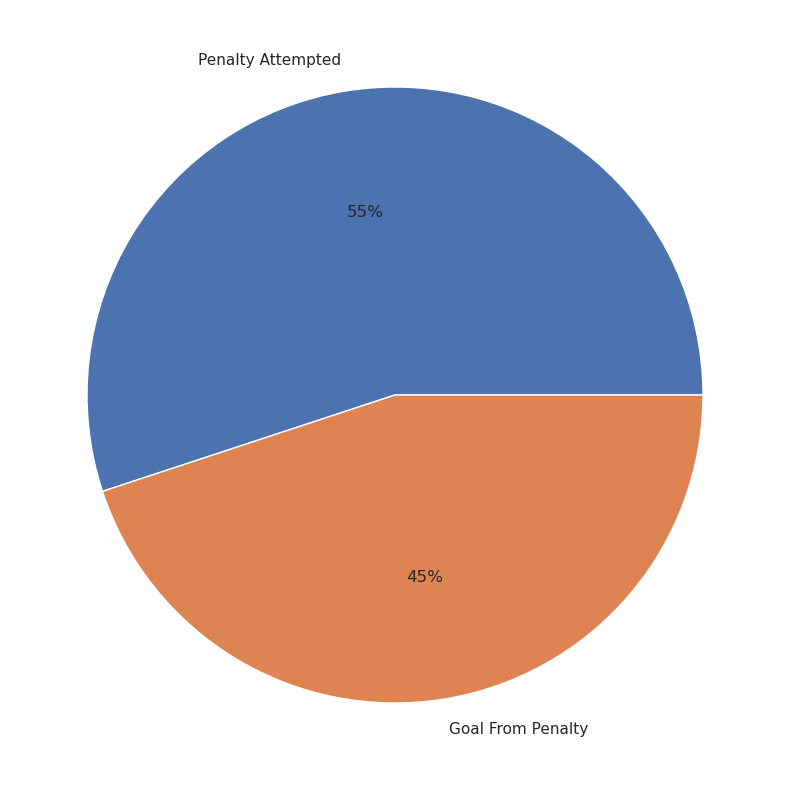

In [169]:
plt.pie(dat,labels=labes,autopct='%.0f%%')

In [198]:
#top goal scorers position
df[['Name','Goals','Position']].sort_values('Goals', ascending=False).head(10)

,Name,Goals,Position
162,Harry Kane,23,FW
81,Mohamed Salah,22,FW
51,Bruno Fernandes,18,MF
214,Patrick Bamford,17,FW
161,Son Heung-min,17,FW
237,Dominic Calvert-Lewin,16,FW
110,Jamie Vardy,15,FW
267,Ollie Watkins,14,FW
33,İlkay Gündoğan,13,MF
191,Alexandre Lacazette,13,FW


In [193]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
